<a href="https://colab.research.google.com/github/Leo1711/cs50web/blob/main/Housing_Price_Prediction_Codebasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction based on [Codebasics](https://https://www.youtube.com/@codebasics)

This is a beginner's learning porject heavily based on the playlist of codebasics where we try to predict the housing prices based on some independent variables. 

Dataset download: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data



## Data Description

Bengaluru (also called Bangalore) is the capital of India's southern Karnataka state. The columns of this dataset are:  
area_type  
availability  
location  
size  
society  
total_sqft  
bath  
balcony  
price  

In [52]:
# Import basic starting libraries
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [53]:
df1 = pd.read_csv("/content/Bengaluru_House_Data.csv")
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning, Feature Engineering and Preparation

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [55]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [56]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [57]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### BHK Fixing

In [58]:
df3['Nr. of Rooms approx.'] = df3['size'].apply(lambda x: x.split(' ')[0])

<ipython-input-58-1ffa43c7c583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Nr. of Rooms approx.'] = df3['size'].apply(lambda x: x.split(' ')[0])


In [59]:
df3.head(5)

,location,size,total_sqft,bath,price,Nr. of Rooms approx.
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [60]:
df3.drop(columns=['size'], inplace=True)
df3.head(5)

<ipython-input-60-bd7eb4f33ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['size'], inplace=True)


,location,total_sqft,bath,price,Nr. of Rooms approx.
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


### sqft Fixing

In [61]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [62]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,Nr. of Rooms approx.
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [63]:
# We want one number for sqft
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [64]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(5)

,location,total_sqft,bath,price,Nr. of Rooms approx.
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


### Changing INR to CHF

In [65]:
df5 = df4.copy()
conversion_rate = 0.012

df5['Price (CHF)'] = df5['price'] * 100000 * conversion_rate


In [66]:
df5.head(5)

,location,total_sqft,bath,price,Nr. of Rooms approx.,Price (CHF)
0,Electronic City Phase II,1056.0,2.0,39.07,2,46884.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,144000.0
2,Uttarahalli,1440.0,2.0,62.00,3,74400.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,114000.0
4,Kothanur,1200.0,2.0,51.00,2,61200.0


In [67]:
df5.drop(columns=['price'], inplace=True)

### Add price per square feet

In [68]:
df5['price_per_sqft'] = df5['Price (CHF)']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft
0,Electronic City Phase II,1056.0,2.0,2,46884.0,4.439773e+06
1,Chikka Tirupathi,2600.0,5.0,4,144000.0,5.538462e+06
2,Uttarahalli,1440.0,2.0,3,74400.0,5.166667e+06
3,Lingadheeranahalli,1521.0,3.0,3,114000.0,7.495069e+06
4,Kothanur,1200.0,2.0,2,61200.0,5.100000e+06


### Dimensionality Reduction of locations

In [69]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [70]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [71]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [72]:
df5.head(10)

,location,total_sqft,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft
0,Electronic City Phase II,1056.0,2.0,2,46884.0,4.439773e+06
1,Chikka Tirupathi,2600.0,5.0,4,144000.0,5.538462e+06
2,Uttarahalli,1440.0,2.0,3,74400.0,5.166667e+06
3,Lingadheeranahalli,1521.0,3.0,3,114000.0,7.495069e+06
4,Kothanur,1200.0,2.0,2,61200.0,5.100000e+06
5,Whitefield,1170.0,2.0,2,45600.0,3.897436e+06
6,Old Airport Road,2732.0,4.0,4,244800.0,8.960469e+06
7,Rajaji Nagar,3300.0,4.0,4,720000.0,2.181818e+07
8,Marathahalli,1310.0,3.0,3,75900.0,5.793893e+06
9,other,1020.0,6.0,6,444000.0,4.352941e+07


### Convert sqft to m2

In [73]:
conversion_factor = 0.092903

convert_to_m2 = lambda x: x * conversion_factor

df5['m2'] = df5['total_sqft'].apply(convert_to_m2)

In [74]:
df5.drop(columns=['total_sqft'], inplace=True)

In [75]:
df5.head()

,location,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft,m2
0,Electronic City Phase II,2.0,2,46884.0,4.439773e+06,98.105568
1,Chikka Tirupathi,5.0,4,144000.0,5.538462e+06,241.547800
2,Uttarahalli,2.0,3,74400.0,5.166667e+06,133.780320
3,Lingadheeranahalli,3.0,3,114000.0,7.495069e+06,141.305463
4,Kothanur,2.0,2,61200.0,5.100000e+06,111.483600


In [76]:
# Mistake of dropping sqft
conversion_factor = 10.7639

convert_to_sqft = lambda x: x * conversion_factor

df5['total_sqft'] = df5['m2'].apply(convert_to_sqft)

In [77]:
df5.head(10)
# small rounding mistakes, but all right

,location,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft,m2,total_sqft
0,Electronic City Phase II,2.0,2,46884.0,4.439773e+06,98.105568,1055.998523
1,Chikka Tirupathi,5.0,4,144000.0,5.538462e+06,241.547800,2599.996364
2,Uttarahalli,2.0,3,74400.0,5.166667e+06,133.780320,1439.997986
3,Lingadheeranahalli,3.0,3,114000.0,7.495069e+06,141.305463,1520.997873
4,Kothanur,2.0,2,61200.0,5.100000e+06,111.483600,1199.998322
5,Whitefield,2.0,2,45600.0,3.897436e+06,108.696510,1169.998364
6,Old Airport Road,4.0,4,244800.0,8.960469e+06,253.810996,2731.996180
7,Rajaji Nagar,4.0,4,720000.0,2.181818e+07,306.579900,3299.995386
8,Marathahalli,3.0,3,75900.0,5.793893e+06,121.702930,1309.998168
9,other,6.0,6,444000.0,4.352941e+07,94.761060,1019.998574


## Removing Outliers

In [78]:
df5['Nr. of Rooms approx.'] = df5['Nr. of Rooms approx.'].astype(float)

In [79]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              13200 non-null  object 
 1   bath                  13200 non-null  float64
 2   Nr. of Rooms approx.  13200 non-null  float64
 3   Price (CHF)           13200 non-null  float64
 4   price_per_sqft        13200 non-null  float64
 5   m2                    13200 non-null  float64
 6   total_sqft            13200 non-null  float64
dtypes: float64(6), object(1)
memory usage: 825.0+ KB


In [80]:
df5['total_sqft'] = df5['total_sqft'].astype(float)
df5[df5.total_sqft/df5['Nr. of Rooms approx.'] < 300].head()

,location,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft,m2,total_sqft
9,other,6.0,6.0,444000.0,4.352941e+07,94.761060,1019.998574
45,HSR Layout,9.0,8.0,240000.0,4.000000e+07,55.741800,599.999161
58,Murugeshpalya,4.0,6.0,180000.0,1.279318e+07,130.714521,1406.998033
68,Devarachikkanahalli,7.0,8.0,102000.0,7.555556e+06,125.419050,1349.998112
70,other,3.0,3.0,120000.0,2.400000e+07,46.451500,499.999301


In [81]:
df6 = df5[~(df5.total_sqft/df5['Nr. of Rooms approx.']<300)]
df6.shape

(12274, 7)

In [82]:
df6.price_per_sqft.describe()

count    1.227400e+04
mean     7.454256e+06
std      4.863858e+06
min      3.213958e+05
25%      5.040000e+06
50%      6.315789e+06
75%      8.190570e+06
max      2.117647e+08
Name: price_per_sqft, dtype: float64

In [83]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10018, 7)

<ipython-input-84-152367f10c60>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==2)]
<ipython-input-84-152367f10c60>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==3)]


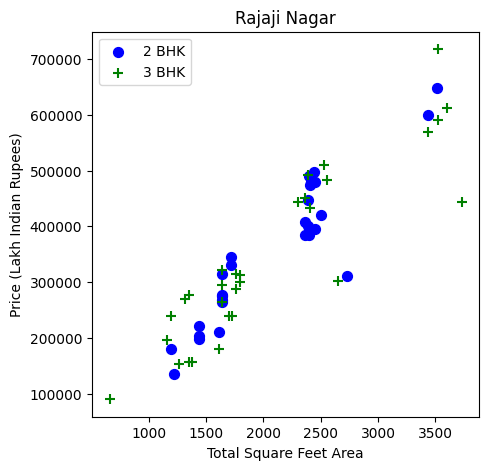

In [84]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==2)]
    bhk3 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==3)]
    matplotlib.rcParams['figure.figsize'] = (5,5)
    plt.scatter(bhk2.total_sqft,bhk2['Price (CHF)'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3['Price (CHF)'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

<ipython-input-84-152367f10c60>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==2)]
<ipython-input-84-152367f10c60>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==3)]


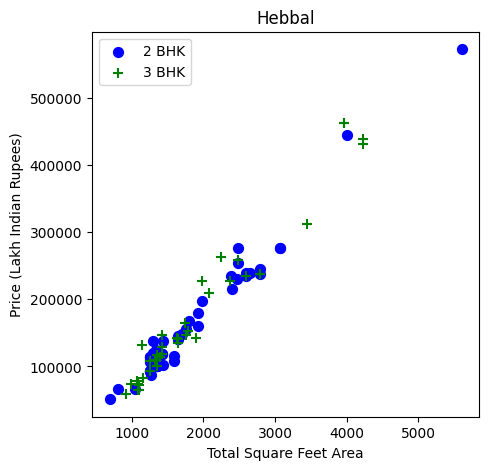

In [85]:
plot_scatter_chart(df7,"Hebbal")

In [86]:
df7.head(5)

,location,bath,Nr. of Rooms approx.,Price (CHF),price_per_sqft,m2,total_sqft
0,1st Block Jayanagar,4.0,4.0,513600.0,1.802105e+07,264.773550,2849.996015
1,1st Block Jayanagar,3.0,3.0,232800.0,1.428221e+07,151.431890,1629.997721
2,1st Block Jayanagar,2.0,3.0,282000.0,1.504000e+07,174.193125,1874.997378
3,1st Block Jayanagar,2.0,3.0,156000.0,1.300000e+07,111.483600,1199.998322
4,1st Block Jayanagar,2.0,2.0,177600.0,1.438057e+07,114.735205,1234.998273


In [87]:
df7 = df7.rename(columns={'Nr. of Rooms approx.': 'bhk'})

In [88]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7150, 7)

<ipython-input-84-152367f10c60>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==2)]
<ipython-input-84-152367f10c60>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==3)]


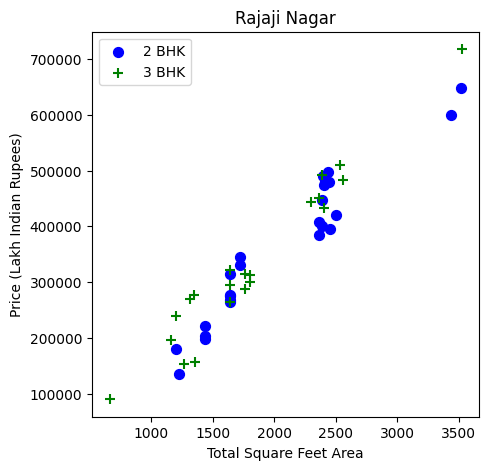

In [89]:
plot_scatter_chart(df8,"Rajaji Nagar")

<ipython-input-84-152367f10c60>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==2)]
<ipython-input-84-152367f10c60>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = df[(df.location==location) & (df5['Nr. of Rooms approx.']==3)]


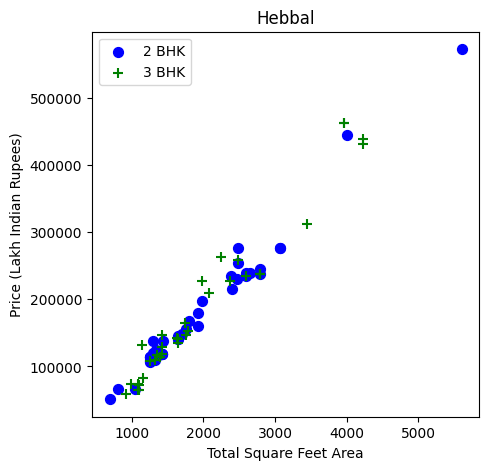

In [90]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

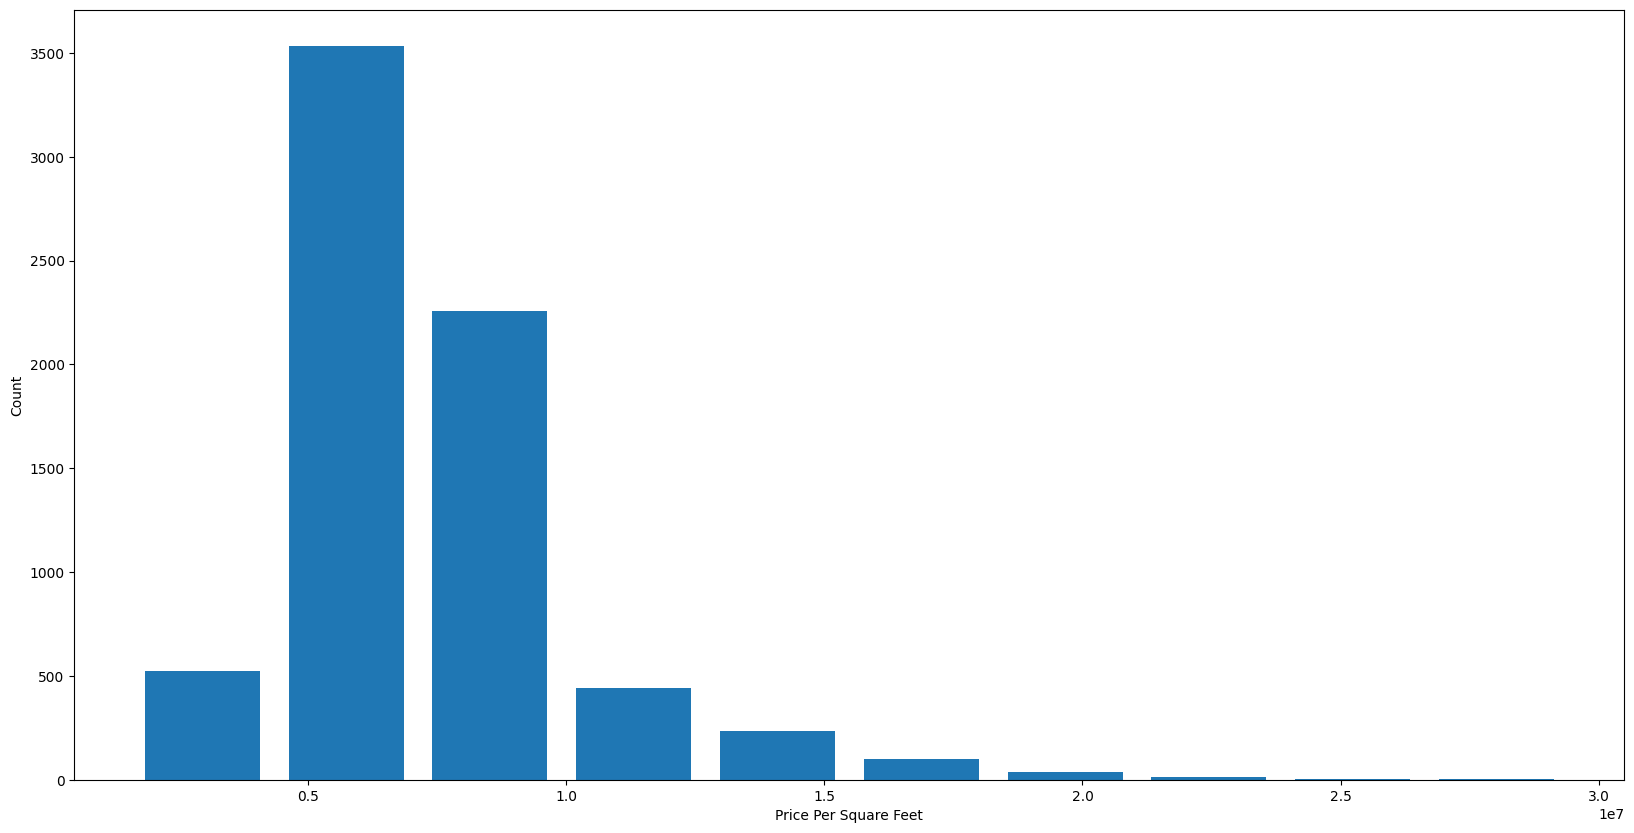

In [91]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

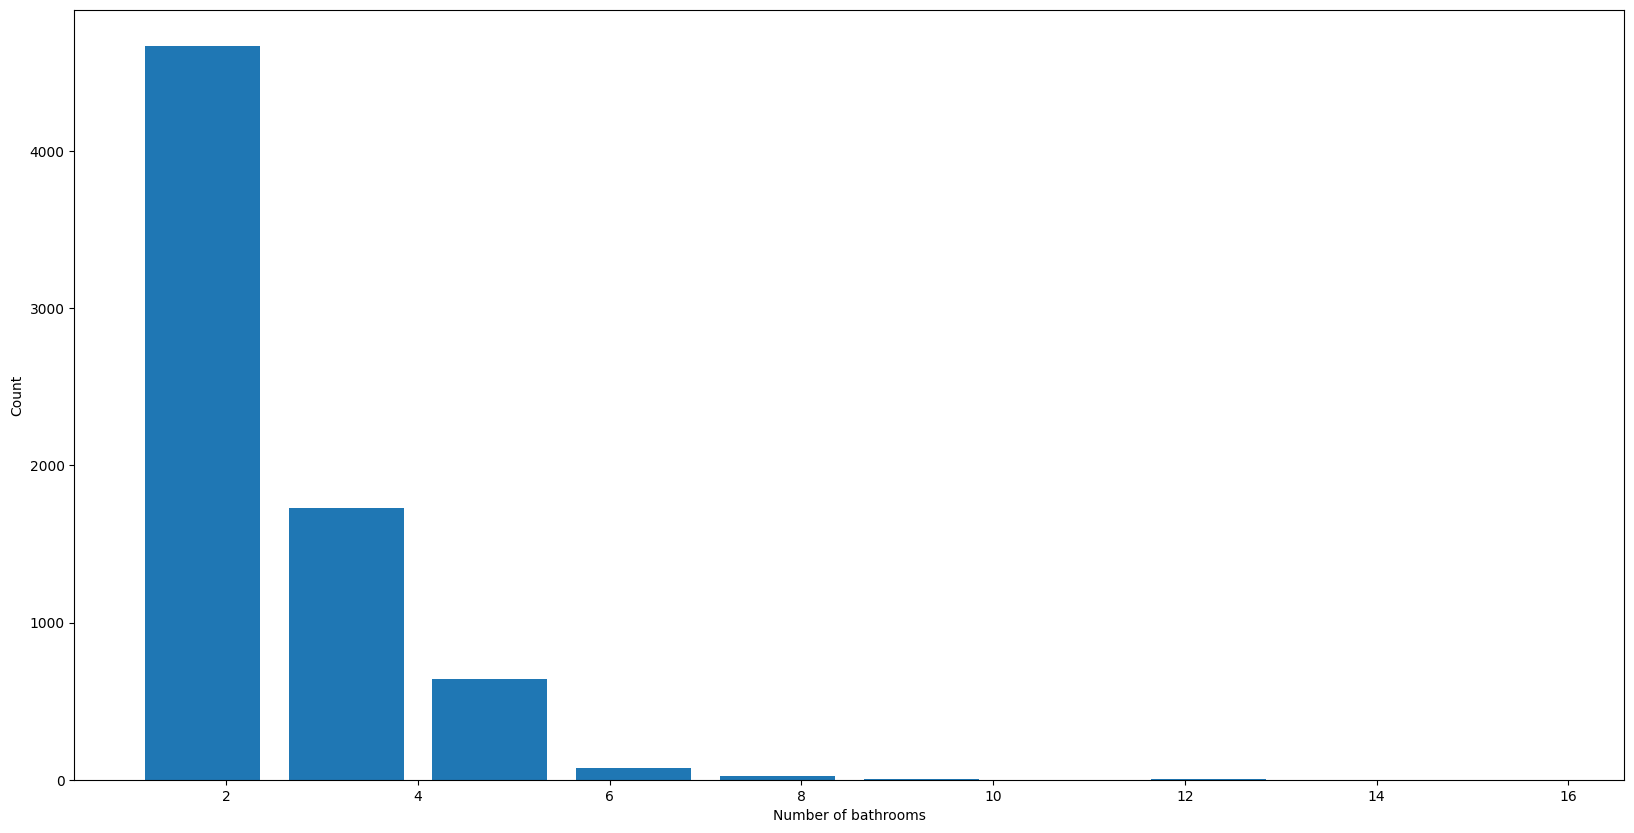

In [92]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [93]:
df8[df8.bath>10]

,location,bath,bhk,Price (CHF),price_per_sqft,m2,total_sqft
5138,Neeladri Nagar,12.0,10.0,192000.0,4.800000e+06,371.612000,3999.994407
8304,other,12.0,10.0,630000.0,5.250000e+06,1114.836000,11999.983220
8389,other,16.0,16.0,660000.0,6.600000e+06,929.030000,9999.986017
9104,other,12.0,11.0,180000.0,3.000000e+06,557.418000,5999.991610
9429,other,13.0,13.0,330000.0,6.082949e+06,503.998775,5424.992414


In [94]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7074, 7)

In [95]:
df9.head(5)

,location,bath,bhk,Price (CHF),price_per_sqft,m2,total_sqft
0,1st Block Jayanagar,4.0,4.0,513600.0,1.802105e+07,264.773550,2849.996015
1,1st Block Jayanagar,3.0,3.0,232800.0,1.428221e+07,151.431890,1629.997721
2,1st Block Jayanagar,2.0,3.0,282000.0,1.504000e+07,174.193125,1874.997378
3,1st Block Jayanagar,2.0,3.0,156000.0,1.300000e+07,111.483600,1199.998322
4,1st Block Jayanagar,2.0,2.0,177600.0,1.438057e+07,114.735205,1234.998273


In [98]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,location,bath,bhk,Price (CHF),m2,total_sqft
0,1st Block Jayanagar,4.0,4.0,513600.0,264.773550,2849.996015
1,1st Block Jayanagar,3.0,3.0,232800.0,151.431890,1629.997721
2,1st Block Jayanagar,2.0,3.0,282000.0,174.193125,1874.997378


## Modeling

### Prepare One-hot encoding, since location is categorical

In [101]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,bath,bhk,Price (CHF),m2,total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,4.0,513600.0,264.773550,2849.996015,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,3.0,232800.0,151.431890,1629.997721,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,3.0,282000.0,174.193125,1874.997378,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,3.0,156000.0,111.483600,1199.998322,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,2.0,177600.0,114.735205,1234.998273,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note, that we have 246 columns...

In [103]:
df12 = df11.drop('location',axis='columns')
df12.head(5)

,bath,bhk,Price (CHF),m2,total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4.0,513600.0,264.773550,2849.996015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,232800.0,151.431890,1629.997721,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,282000.0,174.193125,1874.997378,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3.0,156000.0,111.483600,1199.998322,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,177600.0,114.735205,1234.998273,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
# Data Prep 
X = df12.drop(['Price (CHF)', 'total_sqft'],axis='columns')
X.head(3)

,bath,bhk,m2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4.0,264.773550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,151.431890,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,174.193125,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
X.shape

(7074, 243)

In [272]:
y = df12['Price (CHF)']
y.head(3)

0    513600.0
1    232800.0
2    282000.0
Name: Price (CHF), dtype: float64

In [273]:
# Just a check
len(y)

7074

In [274]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 7074 entries, 0 to 10017
Series name: Price (CHF)
Non-Null Count  Dtype  
--------------  -----  
7074 non-null   float64
dtypes: float64(1)
memory usage: 110.5 KB


In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [276]:
from sklearn.linear_model import LinearRegression
model_I = LinearRegression()
model_I.fit(X_train,y_train)
model_I.score(X_test,y_test)

0.7703955839533776

#### K-Fold Cross Validation

In [277]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

array = cross_val_score(LinearRegression(), X, y, cv=cv)

array_sum = sum(array)
array_length = len(array)
array_avg = array_sum / array_length
print(array_avg)

0.8383786528860879


This is better, by 6%...

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, 1],
                'positive': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'absolute_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.838392,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.838776,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.728643,"{'criterion': 'absolute_error', 'splitter': 'r..."


Linear Regression seems just fine, although lasse is slightly better.

Now, let's manually test the model

In [279]:
y.head()

0    513600.0
1    232800.0
2    282000.0
3    156000.0
4    177600.0
Name: Price (CHF), dtype: float64

In [280]:
X.head()

,bath,bhk,m2,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4.0,264.773550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,151.431890,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,174.193125,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3.0,111.483600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,114.735205,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
from pandas.core.groupby.generic import Manager2D
def predict_price(location,m2,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bhk
    x[2] = m2
    if loc_index >= 0:
        x[loc_index] = 1

    return model_I.predict([x])[0]

In [287]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1101926.969503128

In [294]:
predict_price('1st Block Jayanagar', 264.773550, 4.0, 4.0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


427998.9473634354

------------------------------------------------------------------------------------------------------------------------------------------------------

I was not able to find, why this error pops up. As a first learning project, I am wrapping this one up. 